In [229]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [232]:
kukainputfolder = '/home/lhuang/working/FromRobbie/kuka_deep_pits/data/PROCESSED/'

# # data set 1
# kuka_timestamp = '-Scat20230807-154351.nc'
# ku_height = 155.5 /100
# ka_height = 159.9 /100
# snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit1.xlsx'

# data set 2
kuka_timestamp = '-Scat20230807-154955.nc'
ku_height = 155.5 /100
ka_height = 156.9 /100
snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit2.xlsx'



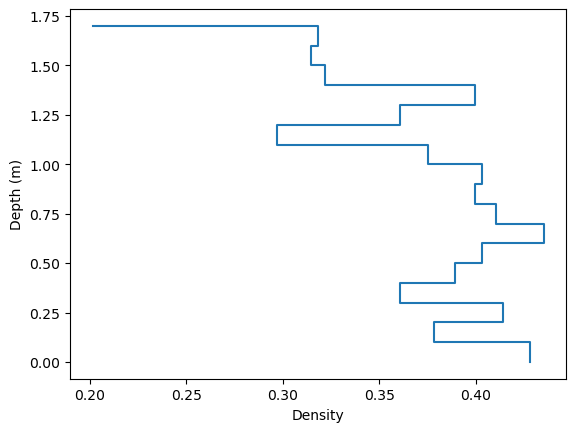

In [233]:
snowpit =  pd.read_excel(snowpit_filename)
plt.figure()
plt.step(snowpit['Density'], snowpit['Layers']/100, where='post')
# Set labels and title
plt.xlabel('Density')
plt.ylabel('Depth (m)')
#plt.ylim(0, 20)
plt.show()



In [234]:
snowpit

,Layers,Density,Permittivity (50 MHz),Loss (50 MHz)
0,170,0.201599,1.78367,0.04870
1,160,0.318314,1.87213,0.09687
2,150,0.314777,1.99367,0.07132
3,140,0.321850,1.97656,0.09112
4,130,0.399660,2.09676,0.09768
5,120,0.360755,2.11670,0.08789
6,110,0.297093,1.97210,0.04875
7,100,0.374903,2.01760,0.09112
8,90,0.403197,2.13780,0.08321
9,80,0.399660,2.07683,0.06478


In [236]:
# Open the NetCDF file
for fq in ['Ku','Ka']:
    filename = 'kuka_stare_decon_'+fq+kuka_timestamp
    nc_file = nc.Dataset(kukainputfolder+filename, 'r')
    print("NetCDF file opened: ", filename)

    # Show all variables in the NetCDF file
    variable_list = []
    #print("Variables in the NetCDF file:")
    for var in nc_file.variables:
        #print(var)
        variable_list.append(var)
        
    # Access specific variable data
    if fq=='Ku':
        Kuvv_power_decon0 = nc_file.variables['vv_power_decon0'][:]
        Kuhh_power_decon0 = nc_file.variables['hh_power_decon0'][:]
        Kuhv_power_decon0 = nc_file.variables['hv_power_decon0'][:]
        Kuvh_power_decon0 = nc_file.variables['vh_power_decon0'][:]
        Ku_range = nc_file.variables['range'][:]
        Ku_start_time = nc_file.variables['start_time'][:]
        
    if fq=='Ka':
        Kavv_power_decon0 = nc_file.variables['vv_power_decon0'][:]
        Kahh_power_decon0 = nc_file.variables['hh_power_decon0'][:]
        Kahv_power_decon0 = nc_file.variables['hv_power_decon0'][:]
        Kavh_power_decon0 = nc_file.variables['vh_power_decon0'][:]
        Ka_range = nc_file.variables['range'][:]
        Ka_start_time = nc_file.variables['start_time'][:]

    #print(variable_data)
    
    #nc_file.close()

    variable_list
    

kuka_powers = {'Ku_vv': Kuvv_power_decon0, 'Ku_hh': Kuhh_power_decon0,'Ku_hv': Kuhv_power_decon0,'Ku_vh': Kuvh_power_decon0,
               'Ka_vv': Kavv_power_decon0, 'Ka_hh': Kahh_power_decon0,'Ka_hv': Kahv_power_decon0,'Ka_vh': Kavh_power_decon0,
               'Ku_range': Ku_range, 'Ka_range': Ka_range, 'Ku_start_time': Ku_start_time, 'Ka_start_time': Ka_start_time}



NetCDF file opened:  kuka_stare_decon_Ku-Scat20230807-154955.nc
NetCDF file opened:  kuka_stare_decon_Ka-Scat20230807-154955.nc


In [14]:
# #---- check the input configs!!!------
# #make sure you input the correct configvars before running the code
# nc_file = nc.Dataset(kukainputfolder + filename, 'r')
# print(nc_file.groups['configvars'])

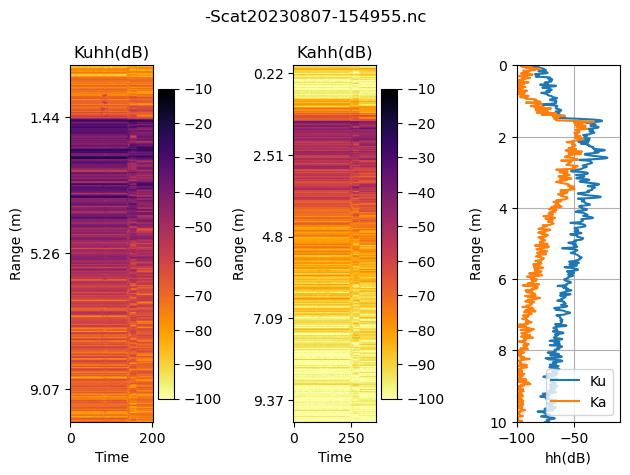

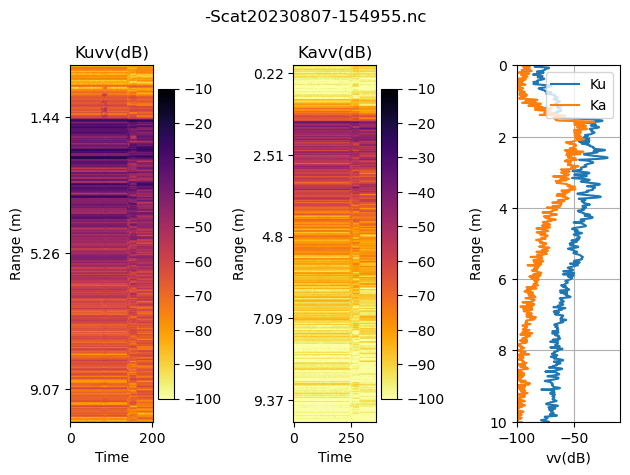

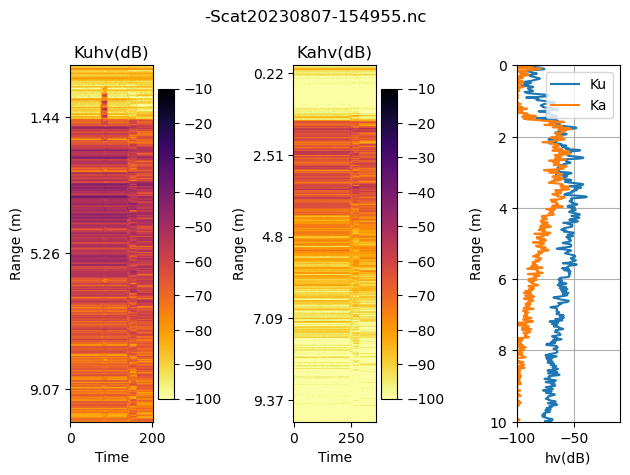

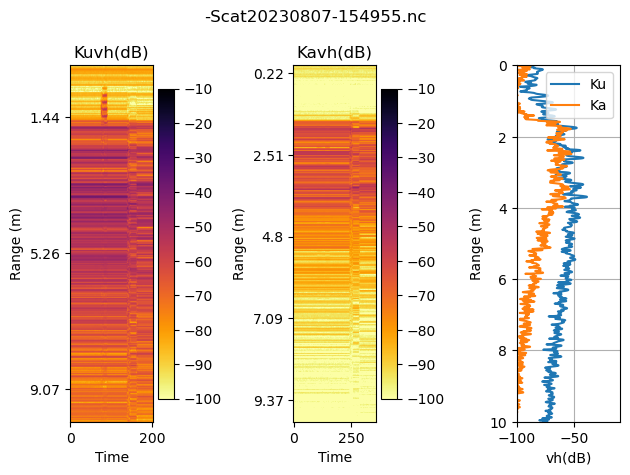

In [237]:
# plot the actual waveforms

for pol in ['hh', 'vv', 'hv', 'vh']:
    
    ku_power = kuka_powers['Ku_'+pol]
    ku_power_db = 10*np.log10(ku_power)
    ku_waveform = np.mean(ku_power, axis=1)
    ku_waveform_db = 10*np.log10(ku_waveform)
    ku_range = kuka_powers['Ku_range']
    
    ka_power = kuka_powers['Ka_'+pol]
    ka_power_db = 10*np.log10(ka_power)
    ka_waveform = np.mean(ka_power, axis=1)
    ka_waveform_db = 10*np.log10(ka_waveform)
    ka_range = kuka_powers['Ka_range']
    
    fig, axes = plt.subplots(1,3)
    
    #img0 = axes[0].imshow(power_db, aspect='auto', extent=[0, 205, 0, 2048]) # extent set the The bounding box in data coordinates that the image will fill. 
    img0 = axes[0].imshow(ku_power_db, aspect='auto',cmap='inferno_r',vmin=-100,vmax=-10)
    axes[0].set_title('Ku'+pol+'(dB)')
    axes[0].set_yticks(np.arange(0, len(ku_range), 500),np.round(ku_range[np.arange(0, len(ku_range), 500)],2))
    fig.colorbar(img0, ax=axes[0], orientation='vertical')  # Add colorbar
    # np.where(np.abs(ku_range - 10) < 0.01)[0] use this to find the matching index
    axes[0].set_ylim(1621,310)
    axes[0].set_ylabel('Range (m)')
    axes[0].set_xlabel('Time')
    
    img1 = axes[1].imshow(ka_power_db, aspect='auto',cmap='inferno_r',vmin=-100,vmax=-10)
    axes[1].set_title('Ka'+pol+'(dB)')
    axes[1].set_yticks(np.arange(0, len(ka_range), 500),np.round(ka_range[np.arange(0, len(ka_range), 500)],2))
    fig.colorbar(img0, ax=axes[1], orientation='vertical')  # Add colorbar
    # np.where(np.abs(ka_range - 10) < 0.01)[0] use this to find the matching index
    axes[1].set_ylim(2635,450)
    axes[1].set_ylabel('Range (m)')
    axes[1].set_xlabel('Time')


    axes[2].plot(ku_waveform_db, ku_range)
    axes[2].plot(ka_waveform_db, Ka_range)
    plt.gca().invert_yaxis()  # Invert the y-axis to set the origin at the upper left corner
    axes[2].set_ylim(10, 0)
    axes[2].set_xlim(-100, -10)
    axes[2].set_xlabel(pol+'(dB)')
    axes[2].set_ylabel('Range (m)')
    axes[2].grid(True)
    axes[2].legend(['Ku', 'Ka'])
        
    plt.suptitle(kuka_timestamp)
    plt.tight_layout()
    #plt.savefig('/home/lhuang/working/KuKa/output/cmp_'+fq+variable_name+'.png')  # Save as PNG file
    plt.show()

In [238]:
ku_hh_power = kuka_powers['Ku_hh']
ku_hh_waveform = np.mean(ku_hh_power, axis=1)
ku_hh_waveform_db = 10*np.log10(ku_hh_waveform)
ku_range = kuka_powers['Ku_range']

ku_hv_power = kuka_powers['Ku_hv']
ku_hv_waveform = np.mean(ku_hv_power, axis=1)
ku_hv_waveform_db = 10*np.log10(ku_hv_waveform)
ku_range = kuka_powers['Ku_range']

ka_hh_power = kuka_powers['Ka_hh']
ka_hh_waveform = np.mean(ka_hh_power, axis=1)
ka_hh_waveform_db = 10*np.log10(ka_hh_waveform)
ka_range = kuka_powers['Ka_range']

ka_hv_power = kuka_powers['Ka_hv']
ka_hv_waveform = np.mean(ka_hv_power, axis=1)
ka_hv_waveform_db = 10*np.log10(ka_hv_waveform)
ka_range = kuka_powers['Ka_range']

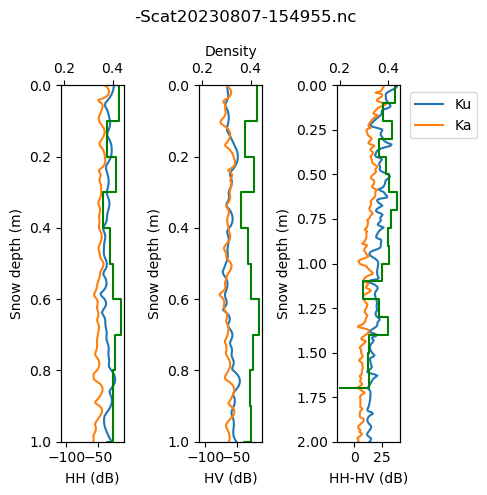

In [241]:
#snow_properties = 'Permittivity (50 MHz)'
snow_properties = 'Density'

fig, axes = plt.subplots(1, 3, figsize=(5, 5))

axes[0].plot(ku_hh_waveform_db, ku_range-ku_height)
axes[0].plot(ka_hh_waveform_db, Ka_range-ka_height)
axes[0].set_ylim(1, 0)
ax2 = axes[0].twiny()
ax2.step(snowpit[snow_properties], snowpit['Layers']/100, where='post', color='green')
axes[0].set_xlabel('HH (dB)')
# axes[0].legend(['Ku HH', 'Ka HH', snow_properties])
axes[0].set_ylabel('Snow depth (m)')

axes[1].plot(ku_hv_waveform_db, ku_range-ku_height)
axes[1].plot(ka_hv_waveform_db, Ka_range-ka_height)
axes[1].set_ylim(1, 0)
ax2 = axes[1].twiny()
ax2.step(snowpit[snow_properties], snowpit['Layers']/100, where='post', color='green')
ax2.set_xlabel(snow_properties)
# axes[1].legend(['Ku HV', 'Ka HV', snow_properties])
axes[1].set_xlabel('HV (dB)')
axes[1].set_ylabel('Snow depth (m)')

axes[2].plot(ku_hh_waveform_db-ku_hv_waveform_db, ku_range-ku_height)
axes[2].plot(ka_hh_waveform_db-ka_hv_waveform_db, Ka_range-ka_height)
axes[2].set_ylim(2, 0)
ax2 = axes[2].twiny()
ax2.step(snowpit[snow_properties], snowpit['Layers']/100, where='post', color='green')
# ax2.set_xlabel(snow_properties)
axes[2].set_xlabel('HH-HV (dB)')
axes[2].legend(['Ku', 'Ka', snow_properties], loc='upper left', bbox_to_anchor=(1.05, 1))
axes[2].set_ylabel('Snow depth (m)')


plt.suptitle(kuka_timestamp)
plt.tight_layout()
#plt.savefig('/home/lhuang/working/KuKa/output/cmp_'+fq+variable_name+'.png')  # Save as PNG file
plt.show()


In [209]:
len(ka_hh_waveform_db)

4096

In [173]:
np.where(np.abs(ka_range - 10) < 0.01)[0] 

array([2635, 2636, 2637, 2638])

In [155]:
ku_range

masked_array(data=[-2.37      , -2.36237061, -2.35474121, ...,
                   13.23211182, 13.23974121, 13.24737061],
             mask=False,
       fill_value=1e+20)

In [104]:
np.shape(ka_power)

(4096, 366)